<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Retail_store.csv')

# Display the first few rows
df.head()


,data,venda,estoque,preco
0,01-01-2014,0,4972,1.29
1,02-01-2014,70,4902,1.29
2,03-01-2014,59,4843,1.29
3,04-01-2014,93,4750,1.29
4,05-01-2014,96,4654,1.29


In [3]:
# Check for missing values in the dataset
df.isnull().sum()


,0
data,0
venda,0
estoque,0
preco,0


In [4]:
# Check for duplicates
df.duplicated().sum()


np.int64(0)

In [5]:
# Summary statistics for numerical columns
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [6]:
df = df.rename(columns={'data': 'date',
    'venda': 'sales',
    'estoque': 'stock',
    'preco': 'price'
})

# Verify the column names
df.head()


,date,sales,stock,price
0,01-01-2014,0,4972,1.29
1,02-01-2014,70,4902,1.29
2,03-01-2014,59,4843,1.29
3,04-01-2014,93,4750,1.29
4,05-01-2014,96,4654,1.29


In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date     0
sales    0
stock    0
price    0
dtype: int64


In [8]:
# Check data types
print(df.dtypes)

date      object
sales      int64
stock      int64
price    float64
dtype: object


In [9]:
# Get descriptive statistics for numerical columns
print(df.describe())

            sales        stock       price
count  937.000000   937.000000  937.000000
mean    90.533618  1608.258271    1.592572
std     80.682089  1356.691877    0.529502
min      0.000000     0.000000    0.000000
25%     33.000000   794.000000    1.290000
50%     76.000000  1348.000000    1.390000
75%    127.000000  1964.000000    1.890000
max    542.000000  7228.000000    2.980000


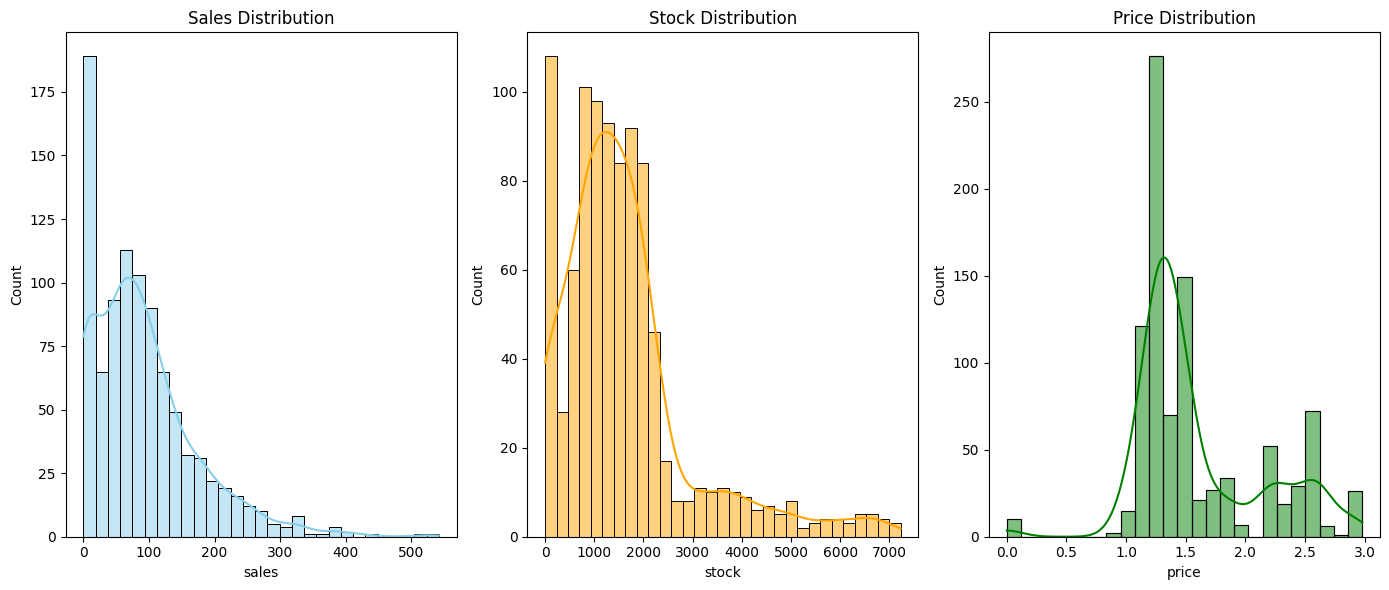

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(14, 6))

# Plot histograms for the numerical columns
plt.subplot(1, 3, 1)
sns.histplot(df['sales'], kde=True, color='skyblue')
plt.title('Sales Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['stock'], kde=True, color='orange')
plt.title('Stock Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['price'], kde=True, color='green')
plt.title('Price Distribution')

# Show the plot
plt.tight_layout()
plt.show()


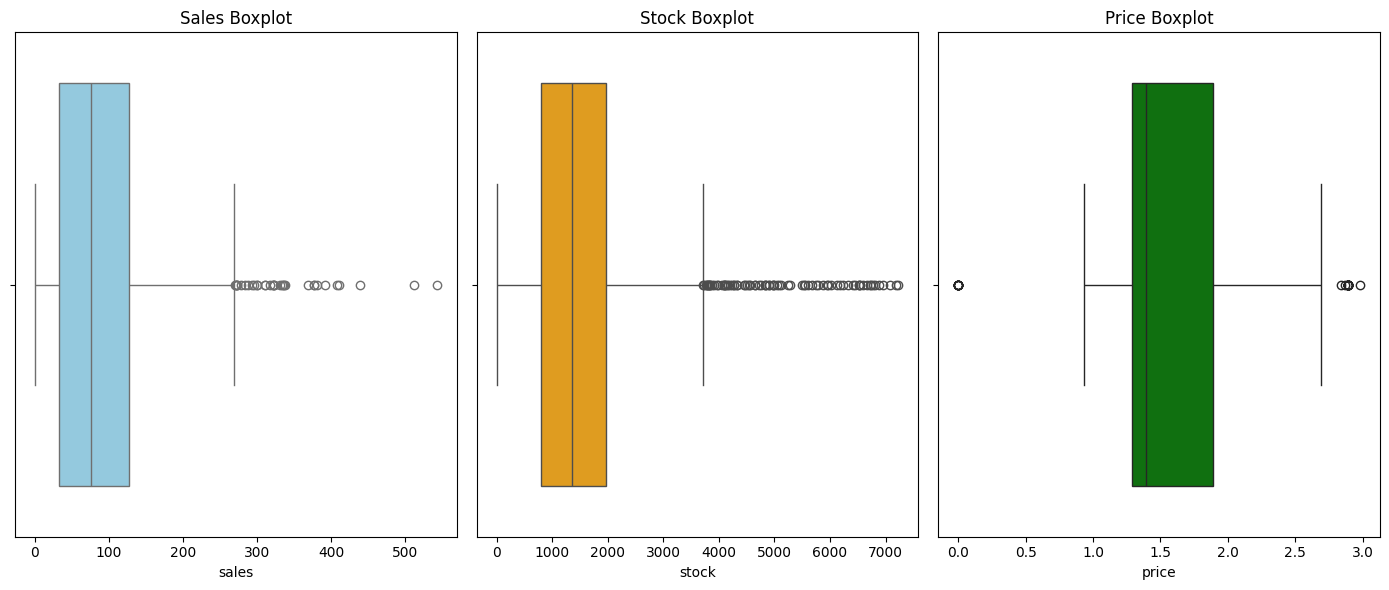

In [11]:
plt.figure(figsize=(14, 6))

# Plot boxplots for the numerical columns
plt.subplot(1, 3, 1)
sns.boxplot(x=df['sales'], color='skyblue')
plt.title('Sales Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['stock'], color='orange')
plt.title('Stock Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['price'], color='green')
plt.title('Price Boxplot')

# Show the plot
plt.tight_layout()
plt.show()


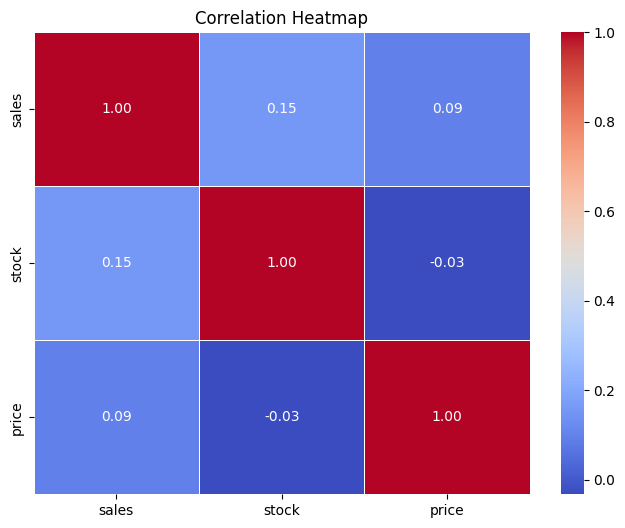

In [12]:
# Calculate the correlation matrix
corr = df[['sales', 'stock', 'price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


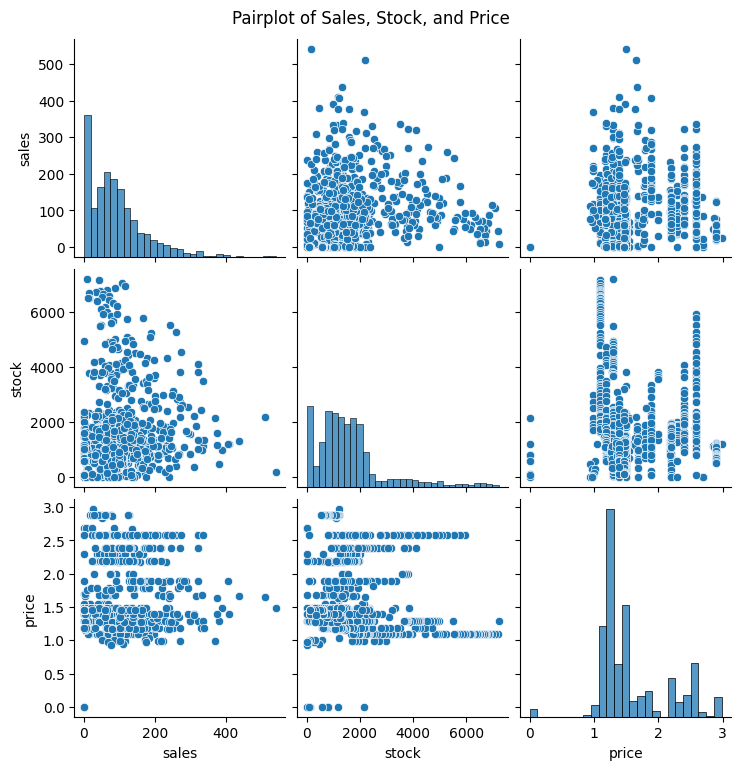

In [13]:
# Pairplot for numerical columns
sns.pairplot(df[['sales', 'stock', 'price']])
plt.suptitle('Pairplot of Sales, Stock, and Price', y=1.02)
plt.show()


In [15]:
#1. Which products have the highest sales?
# Top 10 products with highest sales
top_sales = df.sort_values(by='sales', ascending=False).head(10)
top_sales[[ 'sales', 'stock', 'price']]


,sales,stock,price
305,542,175,1.49
886,512,2187,1.65
893,438,1318,1.66
715,410,1184,1.39
851,408,1196,1.89
634,391,976,1.48
438,381,475,1.29
714,377,1594,1.39
890,377,1182,1.63
30,369,2145,0.99


In [17]:
#2. Which products have the highest stock but low sales (possible overstocking)?
# Filter products with high stock and low sales
overstocked = df[(df['stock'] > df['stock'].quantile(0.75)) & (df['sales'] < df['sales'].quantile(0.25))]
overstocked[[ 'sales', 'stock', 'price']]


,sales,stock,price
0,0,4972,1.29
39,8,7228,1.29
47,13,6718,1.09
51,15,6528,1.09
52,12,6516,1.09
71,29,4199,1.29
77,13,3774,1.29
79,25,3704,1.29
80,25,3679,1.29
144,29,3811,1.99


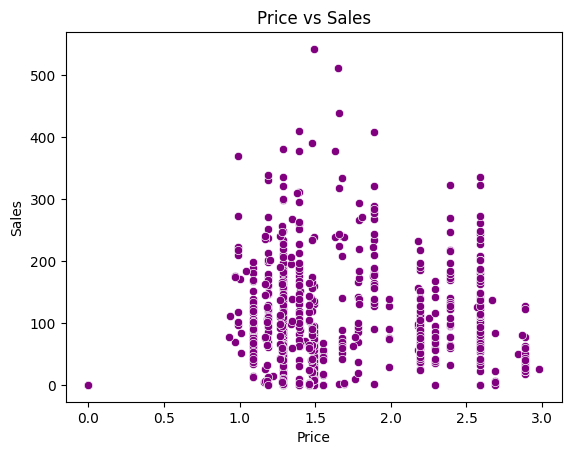

In [18]:
#plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='sales', color='purple')
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()


In [20]:
# Which products are possibly underpriced (high sales but very low price)?
underpriced = df[(df['sales'] > df['sales'].quantile(0.75)) & (df['price'] < df['price'].quantile(0.25))]
underpriced[[ 'sales', 'stock', 'price']]


,sales,stock,price
10,188,5239,1.09
12,134,4984,1.09
16,159,4464,1.19
17,199,4265,1.19
23,198,3595,1.09
24,168,3427,1.09
27,222,2994,0.99
28,272,2723,0.99
29,209,2514,0.99
30,369,2145,0.99


📊 Summary of Key Insights (Retail Product Analysis)
Top-Selling Products:

I identified the top 10 products with the highest sales, which are valuable for demand forecasting and inventory planning.

Overstocked Items:

Some products have a high stock level but very low sales. These could be at risk of becoming obsolete or incurring holding costs. Inventory optimization is needed.

Price vs. Sales Relationship:

A scatter plot revealed whether there’s a correlation between price and sales. Generally, lower-priced items tend to have higher sales—but any outliers here deserve attention.

Underpriced Products:

Products with very high sales but low prices could indicate underpricing. Reviewing these can help you improve profit margins.